In [39]:
import nltk

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string

In [41]:
df=pd.read_csv('Amazon_1002.csv')
df.head()

,Author,Date,Text,Title
0,"['Catherine Clifford', 'Photo Courtesy Blue Or...",2018-05-14 00:00:00,"Worth almost $133 billion, Jeff Bezos is curre...",What Jeff Bezos learned about how to be succes...
1,['Mark Kaufman'],2018-05-12 00:00:00,"Astrophysicist Neil deGrasse Tyson, who is kee...",Neil deGrasse Tyson reminds us how grotesquely...
2,"['Zameena Mejia', 'Diego Donamaria', 'Getty Im...",2018-05-11 00:00:00,"""I came across the fact that Web usage was gro...",Jeff Bezos is the world's most powerful CEO—he...
3,['Kaya Yurieff'],2018-05-11 00:00:00,Two lawmakers are raising concerns about the l...,Lawmakers write letter to CEO Jeff Bezos with ...
4,['Kaya Yurieff'],2018-05-11 00:00:00,Two lawmakers are raising concerns about the l...,Lawmakers write letter to CEO Jeff Bezos with ...


In [42]:
from nltk.corpus import stopwords

In [43]:
#for cleaning text data
def clean(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [44]:
clean("my name is bhawna!!!")

['name', 'bhawna']

In [45]:
df['Text']=df['Text'].apply(lambda x: str(x) )

In [37]:
df['Text']=df['Text'].apply(lambda x: clean(x))

In [46]:
df['Text'][0]

'Worth almost $133 billion, Jeff Bezos is currently the richest person in the world, according to Forbes.  As the boss of both the e-commerce behemoth Amazon and the aerospace company Blue Origin, Bezos is a tech titan whose businesses will very likely shape the future.  Despite relying on technology to build his fortune online, Bezos says he learned a key lesson about success at an early age in a much more down-to-earth setting: working with his grandfather on his grandparents\' South Texas ranch.  What did it teach him? "Being resourceful. If there\'s a problem, there\'s a solution," says Bezos, in an interview with Axel Springer CEO Mathias Döpfner, published by Business Insider at the end of April.  Bezos says his grandfather was "full of wisdom" and resourceful enough to do much of the work on the ranch by himself.  "He was super important for me," Bezos says of his grandfather.  "One of the things that\'s so interesting about that lifestyle and about my grandfather is he did ever

In [47]:
df['Text_Length']=df['Text'].apply(len)

In [48]:
df

,Author,Date,Text,Title,Text_Length
0,"['Catherine Clifford', 'Photo Courtesy Blue Or...",2018-05-14 00:00:00,"Worth almost $133 billion, Jeff Bezos is curre...",What Jeff Bezos learned about how to be succes...,2232
1,['Mark Kaufman'],2018-05-12 00:00:00,"Astrophysicist Neil deGrasse Tyson, who is kee...",Neil deGrasse Tyson reminds us how grotesquely...,2870
2,"['Zameena Mejia', 'Diego Donamaria', 'Getty Im...",2018-05-11 00:00:00,"""I came across the fact that Web usage was gro...",Jeff Bezos is the world's most powerful CEO—he...,1311
3,['Kaya Yurieff'],2018-05-11 00:00:00,Two lawmakers are raising concerns about the l...,Lawmakers write letter to CEO Jeff Bezos with ...,4129
4,['Kaya Yurieff'],2018-05-11 00:00:00,Two lawmakers are raising concerns about the l...,Lawmakers write letter to CEO Jeff Bezos with ...,4129
5,['Kari Paul'],NaN,Jeff Bezos has so much money he doesn’t’ know ...,Jeff Bezos says work-life balance is a ‘debili...,4113
6,"['Tae Kim', 'Daniel Acker', 'Bloomberg', 'Gett...",2018-05-05 00:00:00,Warren Buffett on missing out on Amazon and Go...,Warren Buffett: I was wrong on Google and Amaz...,856
7,[],NaN,"In a recent in-depth interview, Amazon founder...",Jeff Bezos says a secretive company in the Tex...,8334
8,['Chloe Bryan'],2018-05-05 00:00:00,Businessman Richard Guttfield came home from w...,Man reunites with stolen dog after an email to...,1172
9,[],NaN,Amazon CEO Jeff Bezos and Axel Springer CEO Ma...,Jeff Bezos on breaking up and regulating Amazon,4023


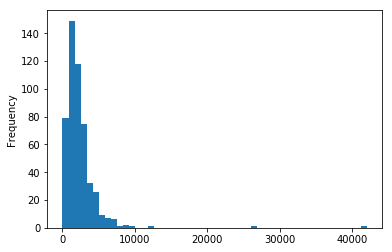

In [49]:
df['Text_Length'].plot(bins=50, kind='hist') 

In [50]:
from textblob import TextBlob

In [51]:
def find_sentiment(text):
    t1=TextBlob(text)
    return t1.sentiment.polarity
    

In [52]:
def sentence_wise_sentiment(text):
    polarity=[]
    max_min=[]
    highest_polar=0
    influential=''
    t1=TextBlob(text)
    for sentence in t1.sentences:
        polarity.append(sentence.sentiment.polarity)
   #     print(sentence.sentiment.polarity)
    max_min.append(max(polarity))
    max_min.append(min(polarity))
  #  for sentence in t1.sentences:
   #     if (sentence.sentiment.polarity) in max_min:
    #        print(sentence)
    if abs(max_min[0])>abs(max_min[1]):
        highest_polar=max_min[0]
    else:
        highest_polar=max_min[1]
    for sentence in t1.sentences:
        if (sentence.sentiment.polarity == highest_polar):
            influential=sentence
    return influential


In [53]:
sentence_wise_sentiment(df['Text'][31])

Sentence("It was the company's first test flight since Dec. 12.")

In [54]:
df['Sentiment_of_text']=df['Text'].apply(lambda x: find_sentiment(x))
df['Sentiment_of_title']=df['Title'].apply(lambda x: find_sentiment(x))
df['statement_with_highest_polarity']=df['Text'].apply(lambda x: sentence_wise_sentiment(x))


In [55]:
def determine_category(title_text):
    if title_text > 0:
        return 'Positive'
    elif title_text < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [56]:
df['Category']=df['Sentiment_of_title'].apply(determine_category)

In [57]:
df.head(20)


,Author,Date,Text,Title,Text_Length,Sentiment_of_text,Sentiment_of_title,statement_with_highest_polarity,Category
0,"['Catherine Clifford', 'Photo Courtesy Blue Or...",2018-05-14 00:00:00,"Worth almost $133 billion, Jeff Bezos is curre...",What Jeff Bezos learned about how to be succes...,2232,0.187345,0.750000,"(Y, o, u, , k, n, o, w, ,, , h, e, , d, i, ...",Positive
1,['Mark Kaufman'],2018-05-12 00:00:00,"Astrophysicist Neil deGrasse Tyson, who is kee...",Neil deGrasse Tyson reminds us how grotesquely...,2870,0.121160,0.375000,"("", E, v, e, n, , w, h, e, n, , t, h, e, y, ...",Positive
2,"['Zameena Mejia', 'Diego Donamaria', 'Getty Im...",2018-05-11 00:00:00,"""I came across the fact that Web usage was gro...",Jeff Bezos is the world's most powerful CEO—he...,1311,0.316111,0.400000,"(I, , w, o, u, l, d, , b, e, , v, e, r, y, ...",Positive
3,['Kaya Yurieff'],2018-05-11 00:00:00,Two lawmakers are raising concerns about the l...,Lawmakers write letter to CEO Jeff Bezos with ...,4129,0.104902,0.000000,"("", O, n, e, , o, f, , t, h, e, , g, r, e, ...",Neutral
4,['Kaya Yurieff'],2018-05-11 00:00:00,Two lawmakers are raising concerns about the l...,Lawmakers write letter to CEO Jeff Bezos with ...,4129,0.104902,0.000000,"("", O, n, e, , o, f, , t, h, e, , g, r, e, ...",Neutral
5,['Kari Paul'],NaN,Jeff Bezos has so much money he doesn’t’ know ...,Jeff Bezos says work-life balance is a ‘debili...,4113,0.190950,0.000000,"(“, A, n, d, , i, f, , I, , a, m, , h, a, ...",Neutral
6,"['Tae Kim', 'Daniel Acker', 'Bloomberg', 'Gett...",2018-05-05 00:00:00,Warren Buffett on missing out on Amazon and Go...,Warren Buffett: I was wrong on Google and Amaz...,856,0.122727,-0.500000,"("", I, , m, a, d, e, , t, h, e, , w, r, o, ...",Negative
7,[],NaN,"In a recent in-depth interview, Amazon founder...",Jeff Bezos says a secretive company in the Tex...,8334,0.121190,0.450000,"(I, t, , w, i, l, l, , b, a, s, i, c, a, l, ...",Positive
8,['Chloe Bryan'],2018-05-05 00:00:00,Businessman Richard Guttfield came home from w...,Man reunites with stolen dog after an email to...,1172,0.057874,0.000000,"(E, v, e, n, t, u, a, l, l, y, ,, , t, h, e, ...",Neutral
9,[],NaN,Amazon CEO Jeff Bezos and Axel Springer CEO Ma...,Jeff Bezos on breaking up and regulating Amazon,4023,0.074144,0.000000,"(N, o, w, , t, h, e, y, , a, r, e, , s, o, ...",Neutral


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
bow_transformer = CountVectorizer(analyzer=clean).fit(df['Text'])
print(len(bow_transformer.vocabulary_))

16323


In [60]:
text_bow = bow_transformer.transform(df['Text'])

In [65]:
print('Shape of Sparse Matrix: ', text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)

Shape of Sparse Matrix:  (508, 16323)
Amount of Non-Zero occurences:  84598


In [66]:
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 1


In [67]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(text_bow)

In [68]:
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(508, 16323)


In [71]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(text_tfidf, df['Category'])

In [72]:
all_predictions = model.predict(text_tfidf)
print(all_predictions)

['Positive' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Positive'
 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Neutral'
 'Positive' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral'
 'Positive' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Ne

In [73]:
from sklearn.metrics import classification_report
print (classification_report(df['Category'], all_predictions))

             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        42
    Neutral       0.63      1.00      0.77       279
   Positive       1.00      0.34      0.51       187

avg / total       0.71      0.68      0.61       508



c:\users\500044649\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
from sklearn.model_selection import train_test_split

text_train, text_test, category_train, category_test=train_test_split(df['Text'], df['Category'], test_size=0.2)

print(len(text_train), len(text_test), len(text_train) + len(text_test))

406 102 508


In [77]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [78]:
pipeline.fit(text_train, category_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function clean at 0x0000023D83E147B8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [79]:
predictions = pipeline.predict(text_test)

In [82]:
print(classification_report(predictions,category_test))

             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00         0
    Neutral       0.98      0.50      0.67       101
   Positive       0.00      0.00      0.00         1

avg / total       0.97      0.50      0.66       102



c:\users\500044649\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
